In [204]:
RANDOM_STATE=42
TEST_SIZE=0.2
LAYERS=4
LR=0.01

In [205]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import from_numpy, nn
import torch

x,y = make_blobs(1000, 2, centers=4, cluster_std=1.5, random_state=RANDOM_STATE)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_STATE, test_size=TEST_SIZE)
x_train, x_test, y_train, y_test = from_numpy(x_train).type(torch.float), from_numpy(x_test).type(torch.float), from_numpy(y_train).type(torch.long), from_numpy(y_test).type(torch.long)

len(x_train), len(y_train), len(x_test), len(y_test)

(torch.Size([800, 2]), torch.Size([800]))

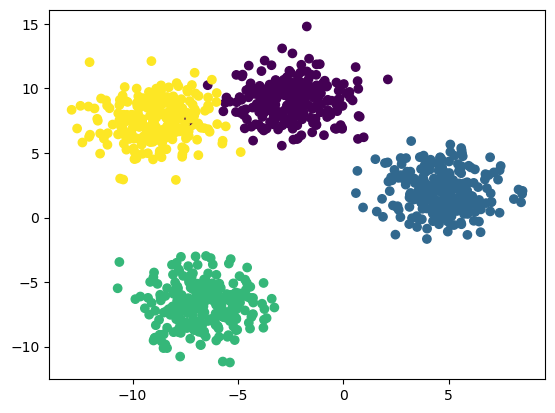

In [206]:
from matplotlib import pyplot as plt

plt.scatter(x[:,0], x[:, 1], c=y)

In [207]:
torch.manual_seed(RANDOM_STATE)
class DetectBlob(nn.Module):
	def __init__(self, num_layers=4):
		super().__init__()
		layers = [nn.Linear(2 if i==0 else 8, 4 if i==num_layers*2-2 else 8) if i%2==0 else nn.ReLU() for i in range(num_layers*2 - 1)]
		self.layer_seq = nn.Sequential(
			*layers
		)
	def forward(self, x) -> torch.Tensor:
		return self.layer_seq(x)

In [208]:
mdl = DetectBlob(num_layers=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mdl.parameters(),lr=LR)
def acc_fn(preds, y):
	return sum(preds==y)/len(y)*100

In [209]:
epochs = 200

for epoch in range(epochs):
	mdl.train()

	probs = mdl(x_train)
	preds = probs.argmax(dim=1)

	loss = loss_fn(probs, y_train)
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	mdl.eval()
	if (epoch+1)%10==0:
		with torch.inference_mode():
			test_probs = mdl(x_test)
			test_preds = test_probs.argmax(dim=1)
			test_loss = loss_fn(test_probs, y_test)
			test_accuracy = acc_fn(test_preds, y_test)

		print(f"loss:{test_loss:.2f} acc:{test_accuracy:.1f}%")


loss:1.35 acc:55.0%
loss:1.34 acc:55.0%
loss:1.33 acc:55.0%
loss:1.31 acc:54.5%
loss:1.30 acc:54.0%
loss:1.28 acc:53.0%
loss:1.25 acc:53.0%
loss:1.23 acc:55.5%
loss:1.20 acc:62.5%
loss:1.16 acc:67.0%
loss:1.13 acc:69.5%
loss:1.09 acc:70.0%
loss:1.05 acc:71.5%
loss:1.00 acc:78.0%
loss:0.96 acc:84.5%
loss:0.92 acc:89.5%
loss:0.88 acc:93.5%
loss:0.84 acc:95.5%
loss:0.80 acc:96.5%
loss:0.76 acc:96.5%
